In [1]:
#importo librerie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#creo dataframe da dati AGENAS
df = pd.DataFrame({"Giorni" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
                              22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
                              41, 42],
    'accessi_ps' : [443, 379, 321, 288, 365, 251, 278, 282, 
                    294, 278, 259, 491, 250, 268, 331, 250, 261, 251, 266, 377, 236, 269, 309, 231, 363,
                   233, 260, 186, 295, 284, 338, 248, 268, 252, 221, 246, 247, 219, 240, 243, 224, 265]})
                                   
                                   

In [4]:
df.head(40)

,Giorni,accessi_ps
0,1,443
1,2,379
2,3,321
3,4,288
4,5,365
5,6,251
6,7,278
7,8,282
8,9,294
9,10,278


In [5]:
#Media mobile a 3 giorni
for i in range(0,df.shape[0]-2):
    df.loc[df.index[i+2],'SMA_3'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1] +df.iloc[i+2,1])/3),1)

In [6]:
df['pandas_SMA_3'] = df.iloc[:,1].rolling(window=3).mean()

C:\Users\giuse\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\giuse\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\giuse\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


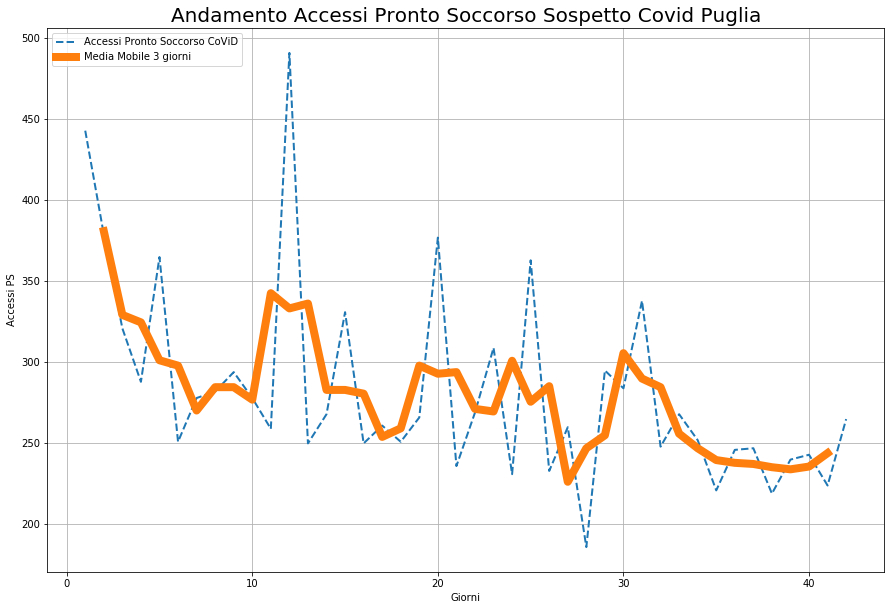

In [7]:
#primo grafico media mobile 3 giorni
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['Giorni'], df['accessi_ps'], label='Accessi Pronto Soccorso CoViD', linewidth=2, linestyle='--')
plt.plot(df['SMA_3'],label='Media Mobile 3 giorni', linewidth=8)
plt.xlabel('Giorni')
plt.ylabel('Accessi PS')
plt.title("Andamento Accessi Pronto Soccorso Sospetto Covid Puglia", fontsize=20)
plt.legend(loc=2)

In [8]:
#Media mobile a 7 giorni
for i in range(0,df.shape[0]-6):
    df.loc[df.index[i+6],'SMA_7'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1] +df.iloc[i+2,1]+df.iloc[i+3,1]+ df.iloc[i+4,1]+ df.iloc[i+5,1]+ df.iloc[i+6,1])/7),1)

In [9]:
df['pandas_SMA_7'] = df.iloc[:,1].rolling(window=7).mean()

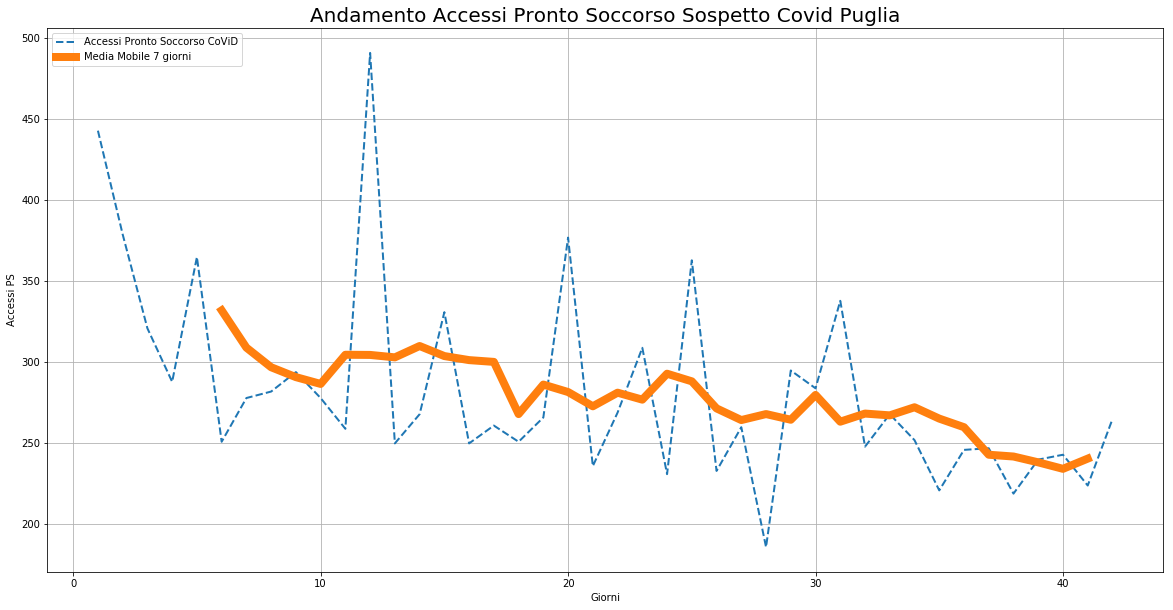

In [10]:
#primo grafico media mobile 7 giorni
plt.figure(figsize=[20,10])
plt.grid(True)
plt.plot(df['Giorni'], df['accessi_ps'], label='Accessi Pronto Soccorso CoViD', linewidth=2, linestyle='--')
plt.plot(df['SMA_7'],label='Media Mobile 7 giorni', linewidth=8)
plt.xlabel('Giorni')
plt.ylabel('Accessi PS')
plt.title("Andamento Accessi Pronto Soccorso Sospetto Covid Puglia", fontsize=20)
plt.legend(loc=2)

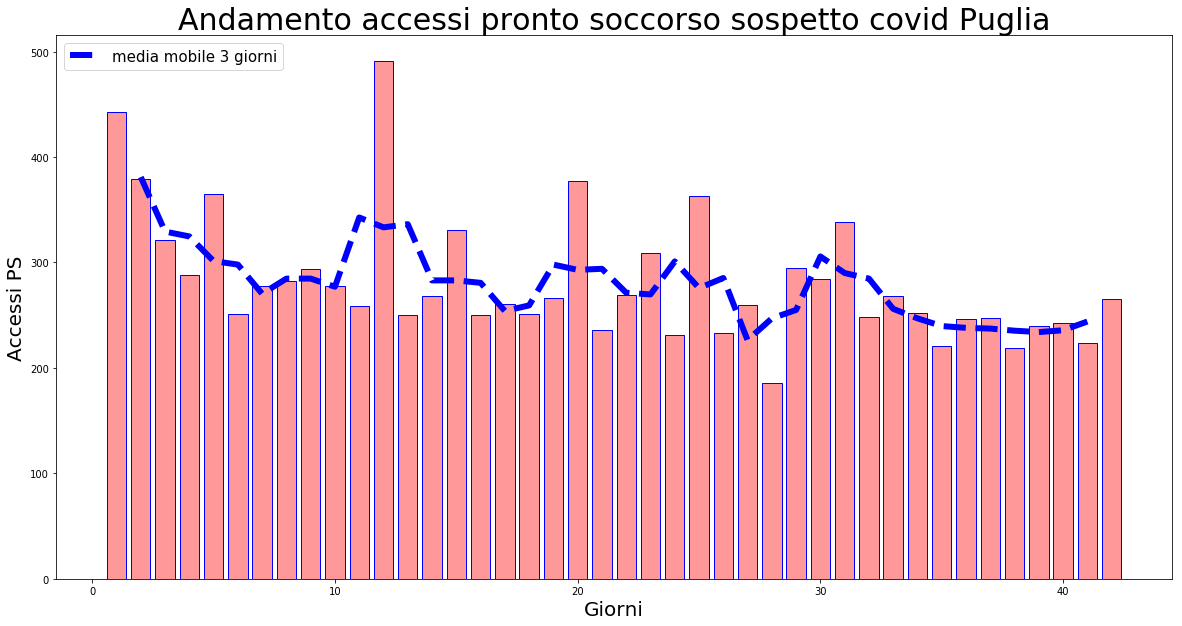

In [11]:
#Ho optato per un grafico misto barre/linee per rendere tutto più leggibile all'occhio umano
plt.figure(figsize=[20,10])
plt.bar(df["Giorni"], df["accessi_ps"], color=(1, 0, 0, 0.4),  edgecolor='blue')
plt.plot(df['SMA_3'], label='media mobile 3 giorni', linewidth=6, color='blue', linestyle='--')
plt.xlabel('Giorni', fontsize=20)
plt.ylabel('Accessi PS', fontsize=20)
plt.title("Andamento accessi pronto soccorso sospetto covid Puglia", fontsize=30)
plt.legend(loc=2, fontsize=15)

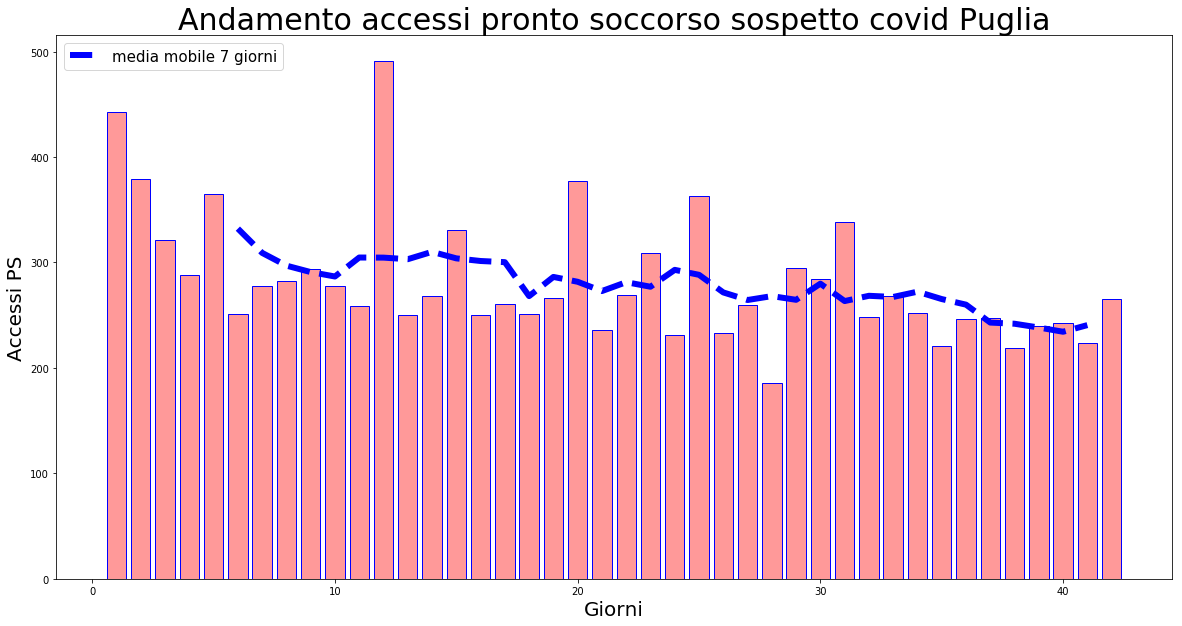

In [12]:
#Idem pure qui ma con media mobie 7
plt.figure(figsize=[20,10])
plt.bar(df["Giorni"], df["accessi_ps"], color=(1, 0, 0, 0.4),  edgecolor='blue')
plt.plot(df['SMA_7'], label='media mobile 7 giorni', linewidth=6, color='blue', linestyle='--')
plt.xlabel('Giorni', fontsize=20)
plt.ylabel('Accessi PS', fontsize=20)
plt.title("Andamento accessi pronto soccorso sospetto covid Puglia", fontsize=30)
plt.legend(loc=2, fontsize=15)

In [18]:
#Realizzo "curve fitting" ovvero "il processo di costruzione di una curva o di una funzione matematica, 
#che abbia la migliore corrispondenza ad una serie di punti assegnati". Fonte: Wikipedia
x = np.array(range(0,42))
m, b = np.polyfit(x, df['accessi_ps'], 1)

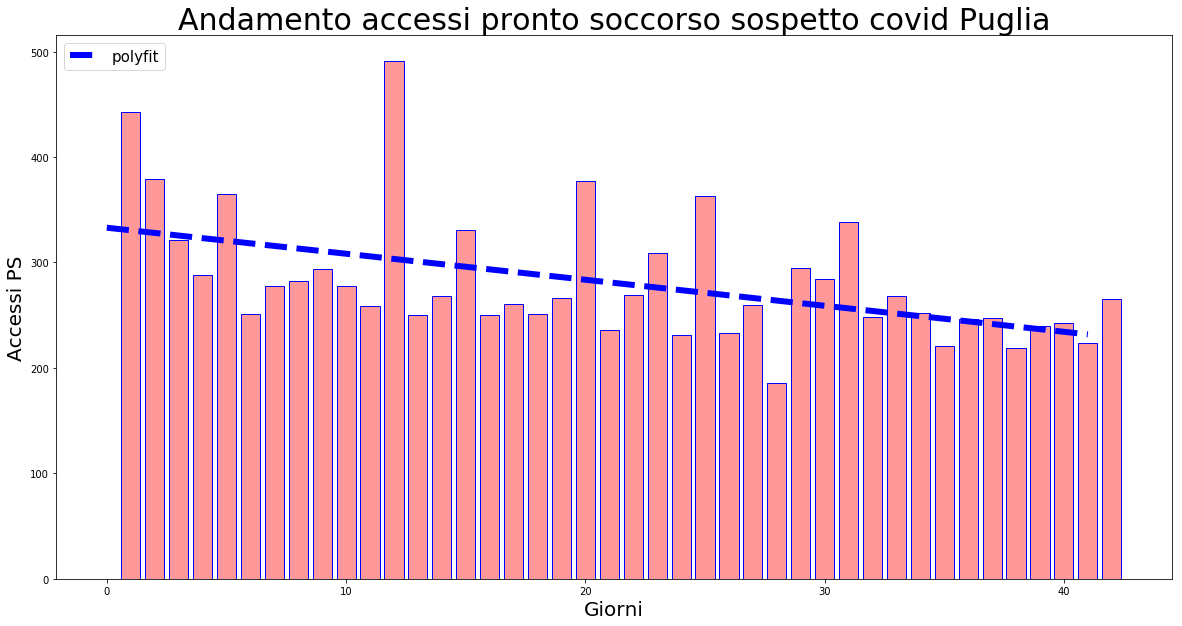

In [19]:
#Grafico con polyfit. In questo caso polinomio di primo grado
plt.figure(figsize=[20,10])
plt.bar(df["Giorni"], df["accessi_ps"], color=(1, 0, 0, 0.4),  edgecolor='blue')
plt.plot(x, m*x + b,label='polyfit', linewidth=6, color='blue', linestyle='--')
plt.xlabel('Giorni', fontsize=20)
plt.ylabel('Accessi PS', fontsize=20)
plt.title("Andamento accessi pronto soccorso sospetto covid Puglia", fontsize=30)
plt.legend(loc=2, fontsize=15)